In [1]:
import os
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import load_img, img_to_array

In [2]:
BASE_PATH = 'EchoScribe ASL Dataset'

In [3]:
labels = []
data = []

In [4]:
for folder in os.listdir(BASE_PATH):
    folder_path = os.path.join(BASE_PATH, folder)
    if os.path.isdir(folder_path):
        print(f"Currently processing folder: {folder}")
        for file_name in os.listdir(folder_path):
            if file_name.endswith('.jpg') or file_name.endswith('.jpeg'):
                image_path = os.path.join(folder_path, file_name)
                image = load_img(image_path, target_size=(128, 128))
                image_arr = img_to_array(image) / 255.0
                data.append(image_arr)
                labels.append(folder)

Currently processing folder: del
Currently processing folder: E
Currently processing folder: H
Currently processing folder: L
Currently processing folder: nothing
Currently processing folder: O


In [5]:
data = np.array(data)
labels = np.array(labels)

In [6]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
labels = le.fit_transform(labels)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [9]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(6, activation='softmax') 
])

In [10]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [11]:
from tensorflow.keras.callbacks import EarlyStopping


In [12]:
# Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1)

In [13]:
# Training the model with Early Stopping
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stopping])

Epoch 1/10
1223/1223 [==============================] - 1151s 844ms/step - loss: 0.1582 - accuracy: 0.9444 - val_loss: 0.0134 - val_accuracy: 0.9957
Epoch 2/10
1223/1223 [==============================] - 591s 483ms/step - loss: 0.0158 - accuracy: 0.9948 - val_loss: 0.0075 - val_accuracy: 0.9979
Epoch 3/10
1223/1223 [==============================] - 445s 364ms/step - loss: 0.0116 - accuracy: 0.9968 - val_loss: 0.0211 - val_accuracy: 0.9956
Epoch 4/10
1223/1223 [==============================] - 447s 365ms/step - loss: 0.0087 - accuracy: 0.9979 - val_loss: 0.0083 - val_accuracy: 0.9977
Epoch 5/10
1223/1223 [==============================] - 451s 369ms/step - loss: 0.0057 - accuracy: 0.9983 - val_loss: 0.0058 - val_accuracy: 0.9990
Epoch 6/10
1223/1223 [==============================] - 448s 367ms/step - loss: 0.0071 - accuracy: 0.9981 - val_loss: 0.0098 - val_accuracy: 0.9988
Epoch 7/10
1223/1223 [==============================] - 453s 370ms/step - loss: 2.8427e-04 - accuracy: 0.9999 -

In [14]:
# Evaluating the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc * 100:.2f}%")

306/306 [==============================] - 32s 94ms/step - loss: 0.0062 - accuracy: 0.9993
Test Accuracy: 99.93%


In [15]:
from sklearn.metrics import confusion_matrix
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [16]:
# Predictions and Confusion Matrix
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

306/306 [==============================] - 88s 73ms/step


In [17]:
conf_matrix = confusion_matrix(y_test, y_pred_classes)

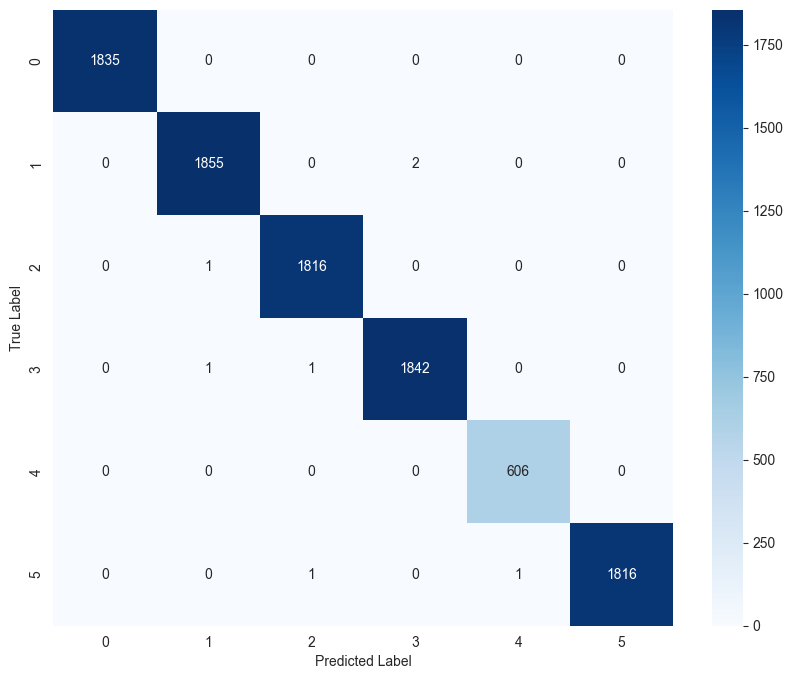

In [18]:
# Plotting the Confusion Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [19]:
import pickle

In [20]:
model_pkl_file = "model.pkl"
with open(model_pkl_file, 'wb') as file:
    pickle.dump(model, file)